<img src='for_markdown/ensemble/3.png'>

<img src='for_markdown/ensemble/4.png'>

In [23]:
import time
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score

sns.set()
sns.set_style('white') 
sns.set_color_codes(palette='pastel')

#plt.rcParams['axes.unicode_minus'] = False
#path = 'C:/Windows/Fonts/malgun.ttf'
#font_name = mpl.font_manager.FontProperties(fname=path, size=50).get_name()
#print(font_name)
#plt.rc('font', family=font_name)

In [24]:
root_dir = 'Z:/3. 개인백업/이민정/한화교육준비/Data/'
os.chdir(root_dir)
data = pd.read_csv('preprocessed_kc_house_data.csv')

In [26]:
data.head()

Unnamed: 0      lat     long  bedrooms  bathrooms  floors  waterfront  \
0           0  47.6747 -122.303         4       2.25     2.0           1   
1           1  47.6914 -122.308         2       1.75     1.0           1   
2           2  47.5951 -122.144         5       2.00     1.5           1   
3           3  47.3273 -122.370         3       2.00     1.0           1   
4           4  47.3584 -122.163         5       3.00     2.0           1   

   grade  condition  sqft_living  sqft_lot  sqft_above  sqft_basement  \
0      8          5         3750      5000        2440           1310   
1      6          3         1390      6670         720            670   
2      7          3         1870      7344        1870              0   
3      7          4         1410     44866        1410              0   
4      9          3         3223      6371        3223              0   

   yr_built  yr_renovated  year_2014  quarter_0  quarter_1  quarter_2    price  
0        94             0          0          0          1          0  1310000  
1        77             0          0          0          1          0   445500  
2        58             0          0          0          1          0   450000  
3        33             0          0          0          1          0   335000  
4         4             0          0          0          1          0   479349

In [27]:
data.columns

Index(['Unnamed: 0', 'lat', 'long', 'bedrooms', 'bathrooms', 'floors',
       'waterfront', 'grade', 'condition', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'year_2014',
       'quarter_0', 'quarter_1', 'quarter_2', 'price'],
      dtype='object')

In [28]:
data = data.drop(['Unnamed: 0'],1)
data.head()

lat     long  bedrooms  bathrooms  floors  waterfront  grade  \
0  47.6747 -122.303         4       2.25     2.0           1      8   
1  47.6914 -122.308         2       1.75     1.0           1      6   
2  47.5951 -122.144         5       2.00     1.5           1      7   
3  47.3273 -122.370         3       2.00     1.0           1      7   
4  47.3584 -122.163         5       3.00     2.0           1      9   

   condition  sqft_living  sqft_lot  sqft_above  sqft_basement  yr_built  \
0          5         3750      5000        2440           1310        94   
1          3         1390      6670         720            670        77   
2          3         1870      7344        1870              0        58   
3          4         1410     44866        1410              0        33   
4          3         3223      6371        3223              0         4   

   yr_renovated  year_2014  quarter_0  quarter_1  quarter_2    price  
0             0          0          0          1          0  1310000  
1             0          0          0          1          0   445500  
2             0          0          0          1          0   450000  
3             0          0          0          1          0   335000  
4             0          0          0          1          0   479349

In [30]:
X = data.drop(['price'],axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=2017020558)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
gb_reg = GradientBoostingRegressor(random_state=2017020558)

In [32]:
np.random.seed(2017020558)
start = time.time()

param_dict = {'max_depth': [3,5,10],
              'loss' : ['ls','lad','huber','quantile'],
              'max_features' : ['auto','sqrt','log2',None]}

cv_gb = GridSearchCV(gb_reg, cv=5,
                    param_grid=param_dict,
                    n_jobs = 5)

cv_gb.fit(X_train, y_train)
print('Best Parameters using grid search: \n',
     cv_gb.best_params_)
end = time.time()
print('Time taken in grid search: {:.2f} seconds'.format(end-start))

Best Parameters using grid search: 
 {'loss': 'lad', 'max_depth': 10, 'max_features': 'auto'}
Time taken in grid search: 188.29 seconds


In [33]:
gb_reg.set_params(loss='lad',
                  max_features='auto',
                  max_depth=10)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=10,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=2017020558, subsample=1.0,
             verbose=0, warm_start=False)

In [34]:
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=10,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=2017020558, subsample=1.0,
             verbose=0, warm_start=False)

In [35]:
y_train_pred = gb_reg.predict(X_train)
y_test_pred = gb_reg.predict(X_test)
print('- MSE (Train)      : {:.4f}'.format(mean_squared_error(y_train, y_train_pred)))
print('- MSE (Test) : {:.4f}'.format(mean_squared_error(y_test, y_test_pred)))

print('- R square (Train)      : {:.4f}'.format(r2_score(y_train, y_train_pred)))
print('- R square (Test) : {:.4f}'.format(r2_score(y_test, y_test_pred)))

- MSE (Train)      : 6675162876.9322
- MSE (Test) : 15765961862.3993
- R square (Train)      : 0.9509
- R square (Test) : 0.8644


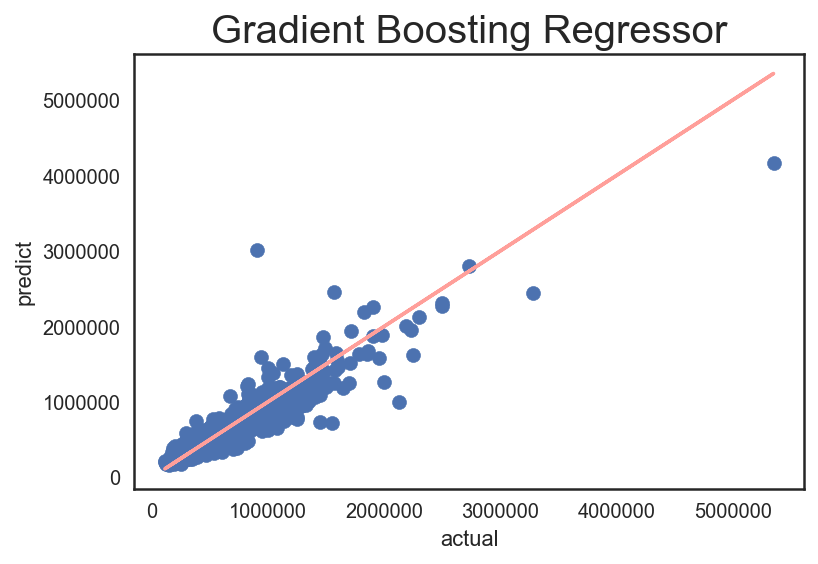

In [36]:
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'r')
plt.xlabel('actual')
plt.ylabel('predict')
plt.title('Gradient Boosting Regressor',fontsize=20)
plt.show()